In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns
from scipy import stats 

### Import data frame 

In [37]:
df=pd.read_csv("GDP_data.csv")
df
df.head()

,Time,Exports,FCE,GDP growth,G_F_C_E,D_Savings,G_Savings,Imports,Inflation,Remittances,U,Reserve,FDII,FDIO,Industry
0,1971,6.29,96.21,-5.48,NaN,3.79,NaN,10.73,2.96,NaN,NaN,NaN,NaN,NaN,7.68
1,1972,5.67,103.36,-13.97,NaN,-3.36,NaN,13.73,4.40,NaN,NaN,184.62,0.001,NaN,6.06
2,1973,6.54,96.60,3.33,3.94,3.40,NaN,11.86,61.41,NaN,NaN,28.76,0.029,NaN,12.11
3,1974,3.70,99.27,9.59,4.64,0.73,NaN,10.35,44.54,NaN,NaN,10.99,0.018,NaN,13.37
4,1975,2.90,99.06,-4.09,3.16,0.94,NaN,8.10,80.57,NaN,NaN,8.82,0.008,NaN,11.61


In [38]:
df.shape
df["FDIO"].fillna(0,inplace=True)
# G_F_C_E fill null by the mean\

x=df["G_F_C_E"].mean()
df["G_F_C_E"].fillna(x,inplace=True)
## G_Savings null values replace by their mean
x=df["G_Savings"].mean()
df["G_Savings"].fillna(x,inplace=True)
x=df["Remittances"].min()
df["Remittances"].fillna(x,inplace=True)

#Reserve	replace null value by mean value
x=df["Reserve"].mean()
df["Reserve"].fillna(x,inplace=True)
#Stocks null value replace by mean value
x=df["U"].mean()
df["U"].fillna(x,inplace=True)
#Foregin direct investment inflow
df["FDII"].fillna(0,inplace=True)

df.head(18)

,Time,Exports,FCE,GDP growth,G_F_C_E,D_Savings,G_Savings,Imports,Inflation,Remittances,U,Reserve,FDII,FDIO,Industry
0,1971,6.29,96.21,-5.48,4.9474,3.79,27.048511,10.73,2.96,0.19,3.174,26.7162,0.000,0.0,7.68
1,1972,5.67,103.36,-13.97,4.9474,-3.36,27.048511,13.73,4.40,0.19,3.174,184.6200,0.001,0.0,6.06
2,1973,6.54,96.60,3.33,3.9400,3.40,27.048511,11.86,61.41,0.19,3.174,28.7600,0.029,0.0,12.11
3,1974,3.70,99.27,9.59,4.6400,0.73,27.048511,10.35,44.54,0.19,3.174,10.9900,0.018,0.0,13.37
4,1975,2.90,99.06,-4.09,3.1600,0.94,27.048511,8.10,80.57,0.19,3.174,8.8200,0.008,0.0,11.61
5,1976,4.75,102.98,5.66,4.0700,-2.98,-0.840000,17.64,-17.63,0.19,3.174,14.4900,0.054,0.0,14.45
6,1977,7.04,93.82,2.67,5.0900,6.18,10.040000,12.38,-3.21,0.82,3.174,10.3600,0.072,0.0,16.73
7,1978,5.56,98.38,7.07,4.8800,1.62,5.700000,15.48,25.62,0.87,3.174,11.3900,0.058,0.0,14.31
8,1979,6.11,98.48,4.80,6.2800,1.52,7.080000,15.80,12.56,1.10,3.174,13.9400,-0.051,0.0,15.69
9,1980,5.49,97.95,0.82,6.1400,2.05,8.330000,17.88,17.56,1.87,3.174,8.7100,0.047,0.0,20.12


In [39]:
df.isnull()

,Time,Exports,FCE,GDP growth,G_F_C_E,D_Savings,G_Savings,Imports,Inflation,Remittances,U,Reserve,FDII,FDIO,Industry
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [44]:
cor=df.corr()
cor

,Time,Exports,FCE,GDP growth,G_F_C_E,D_Savings,G_Savings,Imports,Inflation,Remittances,U,Reserve,FDII,FDIO,Industry
Time,1.000000,0.824104,-0.923254,0.520401,0.626673,0.923254,0.777226,0.709085,-0.323069,0.808826,0.351495,0.301615,0.726335,0.398030,0.924201
Exports,0.824104,1.000000,-0.713690,0.405891,0.528844,0.713690,0.765279,0.911694,-0.279739,0.912736,0.460241,0.320250,0.888112,0.670740,0.621271
FCE,-0.923254,-0.713690,1.000000,-0.529609,-0.471645,-1.000000,-0.763000,-0.545846,0.335627,-0.730363,-0.246886,-0.124291,-0.600304,-0.290678,-0.897257
GDP growth,0.520401,0.405891,-0.529609,1.000000,0.273837,0.529609,0.194996,0.409828,-0.148415,0.426900,0.144636,-0.383200,0.366880,0.200712,0.628906
G_F_C_E,0.626673,0.528844,-0.471645,0.273837,1.000000,0.471645,0.348443,0.512687,-0.339987,0.414002,0.407175,0.403597,0.447069,0.147529,0.593223
D_Savings,0.923254,0.713690,-1.000000,0.529609,0.471645,1.000000,0.763000,0.545846,-0.335627,0.730363,0.246886,0.124291,0.600304,0.290678,0.897257
G_Savings,0.777226,0.765279,-0.763000,0.194996,0.348443,0.763000,1.000000,0.574873,0.015619,0.774889,0.359919,0.437968,0.724691,0.492539,0.591976
Imports,0.709085,0.911694,-0.545846,0.409828,0.512687,0.545846,0.574873,1.000000,-0.325523,0.876628,0.387512,0.303244,0.860934,0.721060,0.551689
Inflation,-0.323069,-0.279739,0.335627,-0.148415,-0.339987,-0.335627,0.015619,-0.325523,1.000000,-0.284432,-0.012688,-0.077384,-0.161197,-0.076935,-0.336594
Remittances,0.808826,0.912736,-0.730363,0.426900,0.414002,0.730363,0.774889,0.876628,-0.284432,1.000000,0.372323,0.234150,0.870664,0.705545,0.659963


<Axes: >

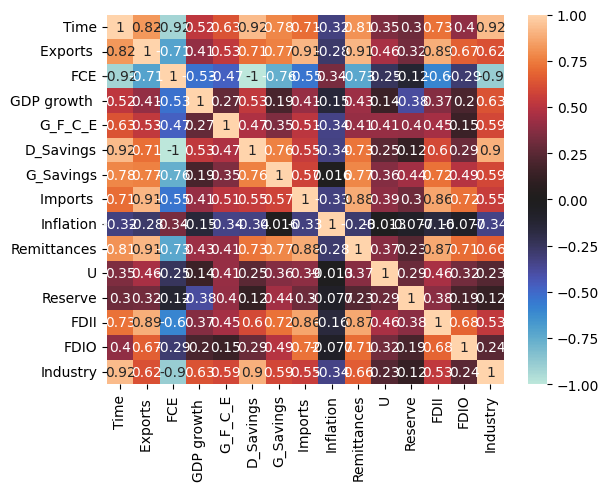

In [47]:
annot=True
hemap=sns.heatmap(cor,vmin=-1,vmax=1,center=0,annot=annot)
hemap